In [1]:
import numpy as np
from scipy import stats
import scipy.stats
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.proportion import proportions_ztest
from scipy.stats import shapiro

# 정규성 검정

### 1.
1. 실습파일 camshaft 데이터를 불러온다.
2. 변수 Supp1에 대해 정규성을 검정합니다.
- (data set: camshaft)

In [2]:
data=pd.read_csv("../data/camshaft.csv", engine='python')
data.head()

,Length,Supp1,Supp2
0,601.4,598.0,601.6
1,601.6,599.8,600.4
2,598.0,600.0,598.4
3,601.4,599.8,600.0
4,599.4,600.0,596.8


In [3]:
df=data['Supp1']
statistic, p=shapiro(df)
print("Shapiro-Wilk Test: statistic={}, p-value={}".format(statistic, p))

Shapiro-Wilk Test: statistic=0.9788156747817993, p-value=0.10744144767522812


> 정규성 검정결과(95% 신뢰수준 사용시) :  p-value가 0.05보다 크므로 귀무가설 기각X   
> => 정규성을 가진다고 본다

### 2.
1. 실습파일 2sample_t_test.csv을 불러온다
2. 변수, Mat_A와 Mat_B에 대해 각각 정규성을 검정합니다
- (data set: 2sample_t_test.csv)

In [4]:
data=pd.read_csv("../data/2sample_t_test.csv", engine='python')
df_A=data['Mat_A']
df_B=data['Mat_B']

df_A=df_A.dropna()
df_B=df_B.dropna()

statistic_A, p_A=shapiro(df_A)
print("Mat_A Shapiro-Wilk Test: statistic={}, p-value={}".format(statistic_A, p_A))

statistic_B, p_B=shapiro(df_B)
print("Mat_B Shapiro-Wilk Test: statistic={}, p-value={}".format(statistic_B, p_B))

Mat_A Shapiro-Wilk Test: statistic=0.9062638878822327, p-value=0.25630074739456177
Mat_B Shapiro-Wilk Test: statistic=0.9729756116867065, p-value=0.9169799089431763


> Mat_A 정규성 검정결과(95% 신뢰수준 사용시) :  p-value가 0.05보다 크므로 귀무가설 기각X   
> => 정규성을 가진다고 본다

> Mat_B 정규성 검정결과(95% 신뢰수준 사용시) :  p-value가 0.05보다 크므로 귀무가설 기각X   
> => 정규성을 가진다고 본다

# 평균 검정(모집단 표준편차를 모르는 경우)

# 1 Sample t-test

### 1.
고객서비스센터의 고객만족도 평균은 76.7이다.  
개선활동을 완료한 후 다음과 같은 10개의 고객만족도 데이터를 얻었다.  
개선활동이 만족도를 변화시켰는가? (a=0.05)  

- 데이터 : 74.5 81.2 73.8 82.0 76.3 75.7 80.2 72.6 77.9 82.8

In [5]:
df=pd.DataFrame({'sample': [74.5, 81.2, 73.8, 82.0, 76.3, 75.7, 80.2, 72.6, 77.9, 82.8]})
# 정규성 검정
shapiro(df)

ShapiroResult(statistic=0.9331596493721008, pvalue=0.47968029975891113)

> p-value > 0.05이므로 귀무가설 기각X => 정규성을 가지고 있다고 볼 수 있다.

In [6]:
t_result=stats.ttest_1samp(df, 76.7)
t, p = t_result.statistic.round(3), t_result.pvalue.round(3)
print("1-Sample t-test")
print("t 통계랑 : {}".format(t))
print("p-value : {}".format(p))

1-Sample t-test
t 통계랑 : [0.864]
p-value : [0.41]


> p-value > 0.05이므로 귀무가설 기각X  
> __결론 : 개선활동이 고객만족도를 변화를 시켰다고 할 수 없다.__

### 2.
고객서비스센터의 고객만족도 평균은 78.0이다.  
개선활동을 완료한 후 다음과 같은 10개의 고객만족도 데이터를 얻었다.  
개선활동이 만족도를 변화시켰는가? (a=0.05)  
- 데이터 : 85.0 79.0 79.1 79.9 81.6 78.6 85.4 83.4 78.1 79.2

In [7]:
df=pd.DataFrame({'sample': [85.0, 79.0, 79.1, 79.9, 81.6, 78.6, 85.4, 83.4, 78.1, 79.2]})
shapiro(df)

ShapiroResult(statistic=0.8473217487335205, pvalue=0.0539751797914505)

> p-value>0.05이므로 귀무가설 기각X => 정규성을 가지고 있다고 볼 수 있다.

In [8]:
t_result=stats.ttest_1samp(df, 76.7)
t, p=t_result.statistic.round(3), t_result.pvalue.round(3)
print("1-Sample t-test")
print("t 통계랑 : {}".format(t))
print("p-value : {}".format(p))

1-Sample t-test
t 통계랑 : [4.879]
p-value : [0.001]


> p-value < 0.05이므로 귀무가설 기각  
> __결론 : 개선활동이 고객만족도를 변화를 시켰다고 할 수 있다.__

# 2 Sample t-test

### 1.
고객만족도 확인을 위하여 A고객과 B고객에 대해 Survey하여 다음의 데이터를 얻었다.  
A고객과 B고객의 모평균에 차이가 있다고 할 수 있는가? (유의수준 a=0.05)  
- 데이터(10점 척도, n=20)
    - A고객 : 6, 5, 5, 4, 6, 7, 6, 4, 5, 6, 4, 5, 5, 6, 4, 8, 6, 5, 6, 7
    - B고객 : 7, 5, 7, 8, 7, 8, 8, 5, 7, 6, 5, 5, 6, 6, 5, 7, 9, 7, 7, 8

In [9]:
dfA=pd.DataFrame({'sample': [6, 5, 5, 4, 6, 7, 6, 4, 5, 6, 4, 5, 5, 6, 4, 8, 6, 5, 6, 7]})
dfB=pd.DataFrame({'sample': [7, 5, 7, 8, 7, 8, 8, 5, 7, 6, 5, 5, 6, 6, 5, 7, 9, 7, 7, 8]})

In [10]:
# 정규성 검정
print("dfA :", shapiro(dfA))
print("dfB :", shapiro(dfB))

dfA : ShapiroResult(statistic=0.9094840288162231, pvalue=0.06230909377336502)
dfB : ShapiroResult(statistic=0.8978105783462524, pvalue=0.03752673789858818)


> dfA는 정규성을 가진다고 할 수 있으나, dfB는 정규성을 가지고 있다 할 수 없다.  
> 하지만 여기선 무시

In [11]:
t_result=stats.ttest_ind(dfA, dfB)
t, p=t_result.statistic.round(3), t_result.pvalue.round(3)
print("2-Sample t-test")
print("t 통계랑 : {}".format(t))
print("p-value : {}".format(p))

2-Sample t-test
t 통계랑 : [-3.122]
p-value : [0.003]


> p-value<0.05 이므로 귀무가설 기각  
> __결론 : 고객간에 고객만족도의 차이가 있다고 볼 수 있다.__

### 2.
제품을 A공급자와 B공급자로부터 제품을 받아 두께를 측정해서 다음의 데이터를 얻었다.  
공급자 간에 모평균에 차이가 있다고 할 수 있는가? (유의수준 a=0.05)

In [12]:
dfA=pd.DataFrame({'sample': [1.883, 1.175, 1.799, 1.768, 1.711, 1.832, 1.427, 1.344]})
dfB=pd.DataFrame({'sample': [1.435, 1.572, 1.486, 1.511, 1.457, 1.548, 1.404, 1.883]})

In [13]:
# 정규성 검정
print("dfA :", shapiro(dfA))
print("dfB :", shapiro(dfB))

dfA : ShapiroResult(statistic=0.8691837787628174, pvalue=0.14798273146152496)
dfB : ShapiroResult(statistic=0.7734811902046204, pvalue=0.014793740585446358)


> dfA는 정규성을 가진다고 할 수 있으나, dfB는 정규성을 가지고 있다 할 수 없다.  
> 하지만 여기선 무시

In [14]:
t_result=stats.ttest_ind(dfA, dfB)
t, p=t_result.statistic.round(3), t_result.pvalue.round(3)
print("2-Sample t-test")
print("t 통계랑 : {}".format(t))
print("p-value : {}".format(p))

2-Sample t-test
t 통계랑 : [0.748]
p-value : [0.467]


> p-value>0.05 이므로 귀무가설 기각X  
> __결론 : 고객간에 고객만족도의 차이가 있다고 볼 수 없다.__

# Paired t-test

### 1.
회사원 10명에 대해 영어점수가 학원가기 전의 점수와 학원수강 후에 영어점수가 짝을 이루고 있다.  
회사원들의 성적은 학원가기 전후에 대해 차이가 있는지 검정하라.

In [34]:
df1=pd.DataFrame({'before':[30, 13, 8, 17, 28, 26, 16, 45, 21, 5]})
df2=pd.DataFrame({'after':[20, 7, 25, 4, 31, 9, 15, 25, 1, 10]})

In [35]:
print("df1 :", shapiro(df1))
print("df2 :", shapiro(df2))

df1 : ShapiroResult(statistic=0.9598731994628906, pvalue=0.7844258546829224)
df2 : ShapiroResult(statistic=0.9456412196159363, pvalue=0.617305338382721)


> df1, df2의 p-value 각각 0.05보다 크므로 각각 정규성을 가지고 있다고 볼 수 있다

In [17]:
t_result=stats.ttest_rel(df1, df2)
t, p=t_result.statistic.round(3), t_result.pvalue.round(3)
print("2-Sample t-test")
print("t 통계랑 : {}".format(t))
print("p-value : {}".format(p))

2-Sample t-test
t 통계랑 : [-5.324]
p-value : [0.]


> p-value<0.05 이므로 귀무가설 기각  
> __결론 : 학원 수강 전후의 점수 차이가 있다고 볼 수 있다.__

In [15]:
df1=pd.DataFrame({'before':[720, 589, 780, 648, 720, 589, 780, 648, 780, 648]})
df2=pd.DataFrame({'after':[810, 670, 790, 712, 810, 670, 790, 712, 790, 712]})

# 정규성 검정
print("df1 :", shapiro(df1))
print("df2 :", shapiro(df2))

> df1는 정규성을 가진다고 할 수 있으나, df2는 정규성을 가지고 있다 할 수 없다.  
> 하지만 여기선 무시

### 2.
회사원 10명에 대해 영어점수가 학원가기 전의 점수와 학원수강 후에 영어점수가 짝을 이루고 있다.  
회사원들의 성적은 학원가기 전후에 대해 차이가 있는지 검정하라.

In [18]:
df1=pd.DataFrame({'before':[720, 589, 780, 648, 720, 589, 780, 648, 780, 648]})
df2=pd.DataFrame({'after':[710, 580, 787, 712, 750, 600, 782, 670, 790, 680]})

In [19]:
# 정규성 검정
print("df1 :", shapiro(df1))
print("df2 :", shapiro(df2))

df1 : ShapiroResult(statistic=0.871309757232666, pvalue=0.10353939980268478)
df2 : ShapiroResult(statistic=0.9132594466209412, pvalue=0.304139107465744)


> df1, df2의 p-value 각각 0.05보다 크므로 각각 정규성을 가지고 있다고 볼 수 있다

In [20]:
t_result=stats.ttest_rel(df1, df2)
t, p=t_result.statistic.round(3), t_result.pvalue.round(4)
print("2-Sample t-test")
print("t 통계랑 : {}".format(t))
print("p-value : {}".format(p))

2-Sample t-test
t 통계랑 : [-2.266]
p-value : [0.0497]


> p-value<0.05 이므로 귀무가설 기각  
> __결론 : 학원 수강 전후의 점수 차이가 있다고 볼 수 있다.__

# 1 Proportion test

### 1.
고급강 A제품을 가공하는 국내 고객사는 전체 중에 10% 정도가 된다.  
한 해 동안 A제품의 품질에 대해 노력을 하여 전체고객 중 100여 개의 업체를 표본으로하여  
가공품질을 확인한 후 15개의 업체가 만족을 표현했다.   
과연 품질개선을 한 결과로 기존보다 전체 고객 중 사용비율의 차이가 있는 것인가? (유의수준(a) = 0.05)

In [21]:
count=15
n=100
value=0.1
t, p=proportions_ztest(count, n, value)
print("1 Proportion test")
print("z:{0:0.3f}".format(t))
print('p:{0:0.3f}'.format(p))

1 Proportion test
z:1.400
p:0.161


> p-value > 0.05이므로 귀무가설 기각X  
> __결론 : 고급강 A제품에 대해 품질개선 결과 기존 대비 사용비율이 차이가 있다고 할 수 없다.__

### 2.
동전이 정상적인가를 검정하기 위해 100번을 던져본 결과, 앞면이 40번 나왔으며 뒷면이 60번 나왔다.  
이 동전은 정상인가를 유의수준 a=0.05로써 검정하라.  
정상적인 동전을 던질 때, 앞면이 나올 확률을 50%이다.

In [22]:
count=40
n=100
value=0.5
t, p=proportions_ztest(count, n, value)
print("1 Proportion test")
print("z:{0:0.3f}".format(t))
print('p:{0:0.3f}'.format(p))

1 Proportion test
z:-2.041
p:0.041


> p-value < 0.05이므로 귀무가설 기각  
> __결론 : 고급강 A제품에 대해 품질개선 결과 기존 대비 사용비율이 차이가 있다고 할 수 있다.__

# 2 Proportion test

### 1.
동일한 제품을 생산하는 두 공장에서 불량률을 측정한 결과 아래와 같다.
두 공정의 불량률이 같다고 할 수 있는가?  
(유의수준(a)=0.05)
- 공장 1 : N1=1000, X1=4
- 공장 2 : N2=1200, X2=1

In [23]:
count=np.array([4, 1])
n=np.array([1000, 1200])
t, p=proportions_ztest(count, n)
print("2 Proportion test")
print("z:{0:0.3f}".format(t))
print('p:{0:0.3f}'.format(p))

2 Proportion test
z:1.553
p:0.120


> p-value>0.05이므로 귀무가설 기각X  
> __결론 : 두 공정의 불량률이 차이가 있다고 할 수 없다.__

### 2.
동일한 제품을 생산하는 두 공장에서 불량률을 측정한 결과 아래와 같다.  
두 공정의 불량률이 같다고 할 수 있는가?  
(유의수준(a)=0.05)
- 공장 A : N1=1200, X1=14
- 공장 B : N2=1200, X2=5

In [24]:
count=np.array([14, 5])
n=np.array([1200, 1200])
t, p=proportions_ztest(count, n)
print("2 Proportion test")
print("z:{0:0.3f}".format(t))
print('p:{0:0.3f}'.format(p))

2 Proportion test
z:2.073
p:0.038


> p-value<0.05이므로 귀무가설 기각  
> __결론 : 두 공정의 불량률이 차이가 있다고 할 수 있다.__

# 카이제곱 검정

### 1.
근무조별로 철강제품을 생산하고 있는데, 생산 제품의 규격이 3가지 종류가 있따.  
근무조별로 제품을 생산하는 부하는 차이가 있겠는가? (유의수준 0.05)

In [41]:
df=pd.DataFrame({'찬성':[182, 213, 203], '반대' : [154, 138, 110]})

chi, p, dof, expected=stats.chi2_contingency(df.T)
print("chi-square test")
print('chisq:{0:0.3f}'.format(chi))
print('p:{0:0.3f}'.format(p))
print('degree pf freedom: {}'.format(dof))
print('expected value: \n{}'.format(expected.round(3)))

chi-square test
chisq:7.878
p:0.019
degree pf freedom: 2
expected value: 
[[200.928 209.898 187.174]
 [135.072 141.102 125.826]]


귀무가설 : 법안에 대한 찬반의사와 소득수준은 서로 독립이다.  
대립가설 : 법안에 대한 찬반의사와 소득수준은 서로 독립이 아니다.

__결론__
p-value < 0.05(유의수준) 이므로 귀무가설을 기각
=> 법안에 대한 찬반의사와 소득수준과는 서로 독립이라고 할 수 없다.

In [25]:
df=pd.DataFrame({'HSG':[270, 260, 236, 234], 'SS':[228, 285, 225, 262], 'SPA':[277, 284,231,208]})

chi, p, dof, expected=stats.chi2_contingency(df.T)
print("chi-square test")
print('chisq:{0:0.3f}'.format(chi))
print('p:{0:0.3f}'.format(p))
print('degree pf freedom: {}'.format(dof))
print('expected value: \n{}'.format(expected.round(3)))

chi-square test
chisq:13.366
p:0.038
degree pf freedom: 6
expected value: 
[[258.333 276.333 230.667 234.667]
 [258.333 276.333 230.667 234.667]
 [258.333 276.333 230.667 234.667]]


> p-value<0.05이므로 귀무가설 기각  
> __결론 : 근무조별로 제품을 생산하는 부하 차이가 있다고 할 수 있다.__

### 2.
노트북 컴퓨터의 6가지 제품(A, B, C, D, E, F)에 대하여 7가지 제품의 이미지를 중복 선택 할 수 있도록   
32명의 소비자를 대상으로 설문 조사한 Table이다.  
각 제품에 대해 이미지에 대해 차이가 있겠는가? (유의수준 0.05)

In [26]:
df = pd.DataFrame({'A': [18,  1, 8, 7, 10, 9, 10], 'B': [8, 2, 14, 5, 5, 9, 4],
                   'C': [4, 1, 3, 4, 9, 5, 4],'D': [4, 1, 2, 3, 2, 7, 3],
                   'E': [3, 1, 3, 1, 1, 1, 1], 'F': [3, 25, 8, 10, 2, 1, 7]})
chi, p, dof, expected=stats.chi2_contingency(df.T)
print("chi-square test")
print('chisq:{0:0.3f}'.format(chi))
print('p:{0:0.3f}'.format(p))
print('degree pf freedom: {}'.format(dof))
print('expected value: \n{}'.format(expected.round(3)))

chi-square test
chisq:98.274
p:0.000
degree pf freedom: 30
expected value: 
[[11.004  8.528 10.454  8.253  7.978  8.803  7.978]
 [ 8.21   6.362  7.799  6.157  5.952  6.568  5.952]
 [ 5.24   4.061  4.978  3.93   3.799  4.192  3.799]
 [ 3.843  2.978  3.651  2.882  2.786  3.074  2.786]
 [ 1.921  1.489  1.825  1.441  1.393  1.537  1.393]
 [ 9.782  7.581  9.293  7.336  7.092  7.825  7.092]]


> p-value<0.05이므로 귀무가설 기각  
> __결론 : 각 제품에 대해 이미지에 대한 차이가 있다고 할 수 있다.__

# One way ANOVA

### 1.
OO회사 마케팅실 그룹별 직원들의 TOEIC 성적에 차이가 있는지를 알고 싶다.  
A Group, B Group, C Group, 간의 토익 점수의 차이 여부를 검정하세요. (유의수주(a) = 0.05)

<AxesSubplot:>

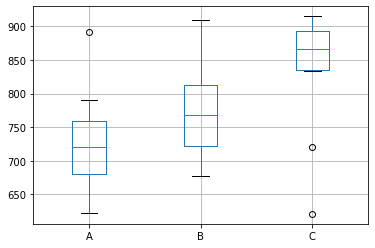

In [27]:
df = pd.DataFrame({'A': [892, 623, 721, 678, 723, 790, 720, 670, 690, 771],'B': [721, 821, 910, 678, 723, 790, 711, 790, 745, 891],
                   'C': [621, 915, 888, 721, 894, 834, 841, 912, 845, 889]})

df.boxplot(['A', 'B', 'C'])

In [28]:
f_result=stats.f_oneway(df['A'], df['B'], df['C'])

f,p=f_result.statistic.round(3), f_result.pvalue.round(3)
print("One-way")
print("F 통계랑:{}".format(f))
print("p-value:{}".format(p))

One-way
F 통계랑:4.263
p-value:0.025


In [36]:
df1=pd.DataFrame({'before':[30, 13, 8, 17, 28, 26, 16, 45, 21, 5]})
df2=pd.DataFrame({'after':[20, 7, 25, 4, 31, 9, 15, 25, 1, 10]})

In [37]:
# 정규성 검정
print("df1 :", shapiro(df1))
print("df2 :", shapiro(df2))

df1 : ShapiroResult(statistic=0.9598731994628906, pvalue=0.7844258546829224)
df2 : ShapiroResult(statistic=0.9456412196159363, pvalue=0.617305338382721)


> df1, df2의 p-value 각각 0.05보다 크므로 각각 정규성을 가지고 있다고 볼 수 있다

In [40]:
f_result=stats.f_oneway(df1, df2)
f,p=f_result.statistic.round(3), f_result.pvalue.round(3)
print("One-way")
print("F 통계랑:{}".format(f))
print("p-value:{}".format(p))

One-way
F 통계랑:[1.585]
p-value:[0.224]


> p-value<0.05이므로 귀무가설 기각  
> __결론 : 그룹간의 토익 점수가 차이가 있다고 할 수 있다.__

### 2.
철강의 청정도를 높이기 위해 제강공정에서 2차 정련을 실시하는데,  
강종별과 type에 따라 2차정련 시간에 차이가 있는지 검정하라 (유의수준 0.05)
- (data set:ANOVA.csv)

In [29]:
data=pd.read_csv("../data/ANOVA.csv")
data.head()

,time,charge,gangjong,type
0,32.2,A,a,a
1,30.4,B,a,a
2,33.6,C,a,a
3,36.4,D,a,a
4,33.9,E,a,a


- 강종별

One-way
F 통계랑:4.172
p-value:0.019


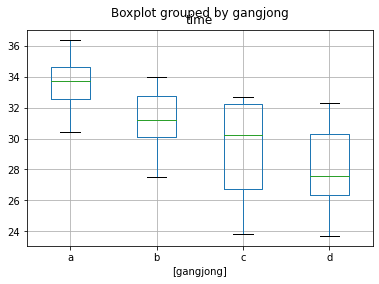

In [30]:
data.boxplot(by='gangjong')

df1_a=data[data['gangjong']=='a']
df1_b=data[data['gangjong']=='b']
df1_c=data[data['gangjong']=='c']
df1_d=data[data['gangjong']=='d']

f_result=stats.f_oneway(df1_a['time'], df1_b['time'], df1_c['time'], df1_d['time'])
f,p=f_result.statistic.round(3), f_result.pvalue.round(3)
print("One-way")
print("F 통계랑:{}".format(f))
print("p-value:{}".format(p))

> p-value < 0.05이므로 귀무가설 기각  
> __결론 : 강종별에 따라 2차 정련 시간에 차이가 있다고 할 수 있다.__

- type별

One-way
F 통계랑:9.654
p-value:0.005


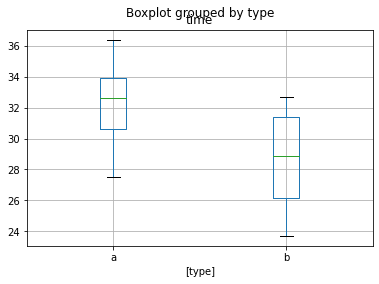

In [31]:
data.boxplot(by='type')

df1_a=data[data['type']=='a']
df1_b=data[data['type']=='b']

f_result=stats.f_oneway(df1_a['time'], df1_b['time'])
f,p=f_result.statistic.round(3), f_result.pvalue.round(3)
print("One-way")
print("F 통계랑:{}".format(f))
print("p-value:{}".format(p))

> p-value < 0.05이므로 귀무가설 기각  
> __결론 : type별에 따라 2차 정련 시간에 차이가 있다고 할 수 있다.__

In [32]:
data=pd.DataFrame({'A':[25, 30, 20, 23, 27, 33, 23, 20, 25, 24],
                  'B' : [31, 30, 34, 30, 28, 31, 30, 31, 32, 30],
                  'C' : [19, 21, 27, 25, 25, 30, 26, 29, 30, 24],
                  'D' : [18, 25, 16, 19, 20, 20, 25, 22, 23, 17]})
mu=data.mean().mean()
s=data.values.std()
x=35
prob=stats.norm.cdf(x, mu, s)
print("전표처리에 드는 시간이 {0}분 이상 소요될 확률 : {1:.1f}%".format(x, (1-prob)*100))

전표처리에 드는 시간이 35분 이상 소요될 확률 : 2.3%


In [33]:
data.values.std()

4.76418933292958